In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from trainers import VAE_GAN_Trainer
from vae_gans import MNIST_VAE_GAN

# os.environ["CUDA_VISIBLE_DEVICES"]="2"

mnist = input_data.read_data_sets("MNIST_data/")


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


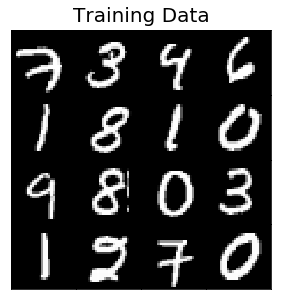

In [4]:
plt.figure(figsize=(4, 4))

for i in range(16):
    image = mnist.train.images[i]

    plt.subplot(4, 4, i + 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.suptitle('Training Data', fontsize=20, y=1.03)
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)

plt.show()
plt.close()


Epoch : 1   | Enc Loss : 239.55208 | Dec Loss : 3.33395 | Disc Loss : 1.95976


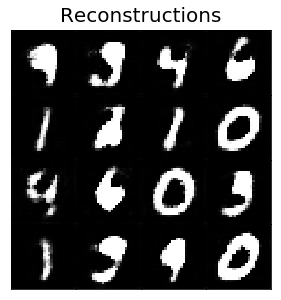

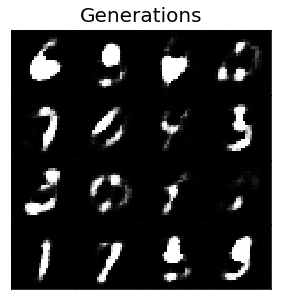

Epoch : 2   | Enc Loss : 142.17957 | Dec Loss : 2.87879 | Disc Loss : 1.92990


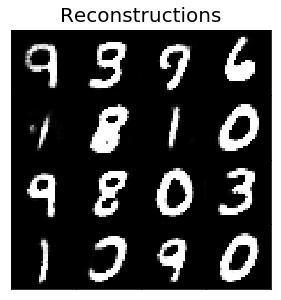

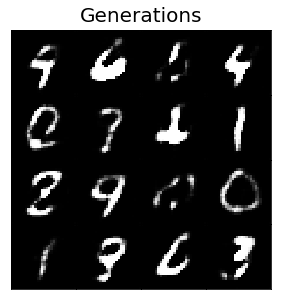

Epoch : 3   | Enc Loss : 121.68878 | Dec Loss : 2.74155 | Disc Loss : 1.91009


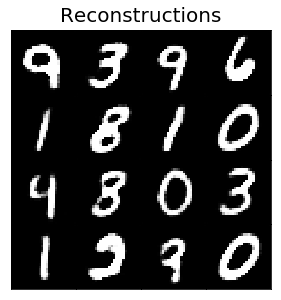

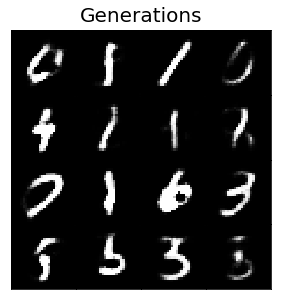

Epoch : 4   | Enc Loss : 113.04408 | Dec Loss : 2.68981 | Disc Loss : 1.90999


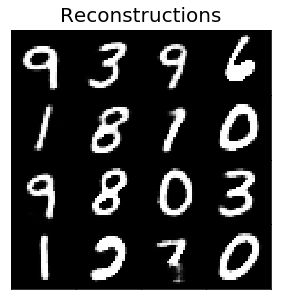

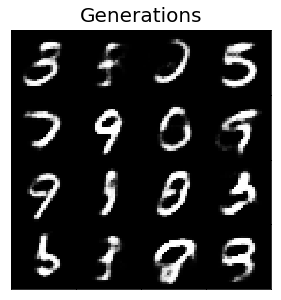

Epoch : 5   | Enc Loss : 107.49158 | Dec Loss : 2.65622 | Disc Loss : 1.90994


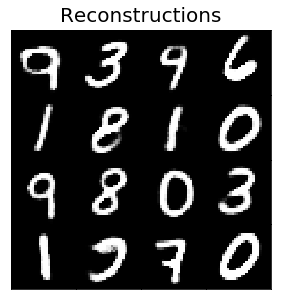

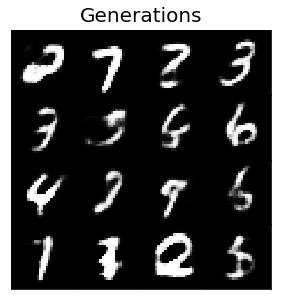

Epoch : 6   | Enc Loss : 103.22222 | Dec Loss : 2.63093 | Disc Loss : 1.91007


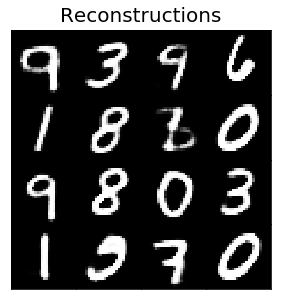

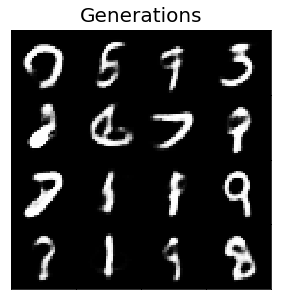

Epoch : 7   | Enc Loss : 99.64943 | Dec Loss : 2.61065 | Disc Loss : 1.90994


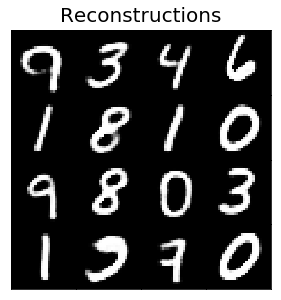

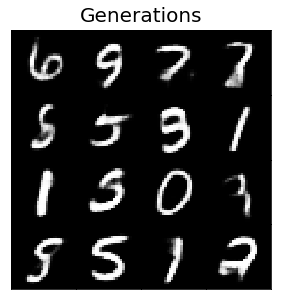

Epoch : 8   | Enc Loss : 96.76197 | Dec Loss : 2.59502 | Disc Loss : 1.90992


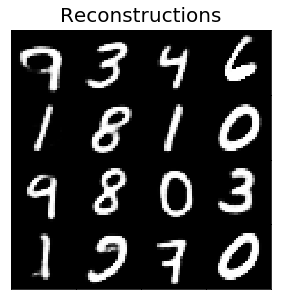

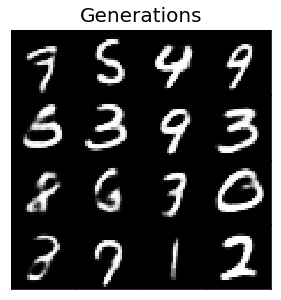

Epoch : 9   | Enc Loss : 94.37072 | Dec Loss : 2.58116 | Disc Loss : 1.90988


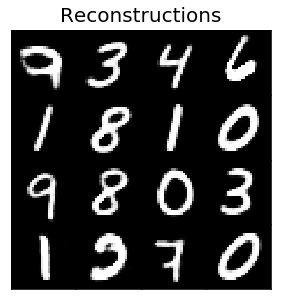

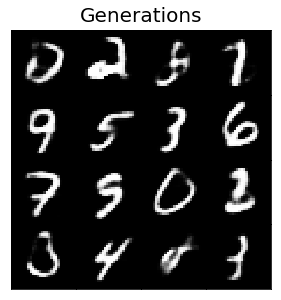

Epoch : 10  | Enc Loss : 92.35886 | Dec Loss : 2.57045 | Disc Loss : 1.90993


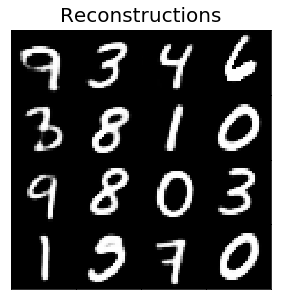

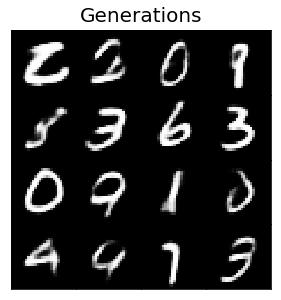

Epoch : 11  | Enc Loss : 90.57284 | Dec Loss : 2.56107 | Disc Loss : 1.91060


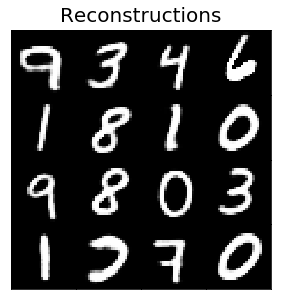

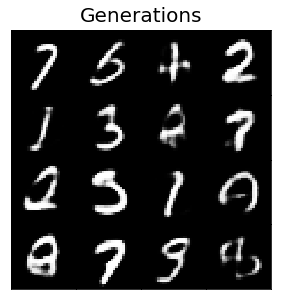

Epoch : 12  | Enc Loss : 88.89711 | Dec Loss : 2.54986 | Disc Loss : 1.90975


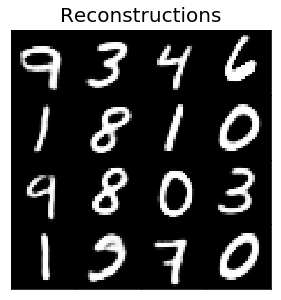

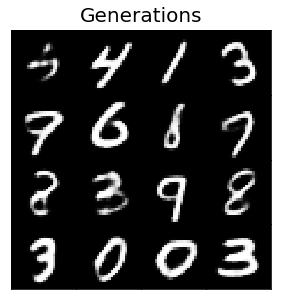

Epoch : 13  | Enc Loss : 87.27126 | Dec Loss : 2.54164 | Disc Loss : 1.90984


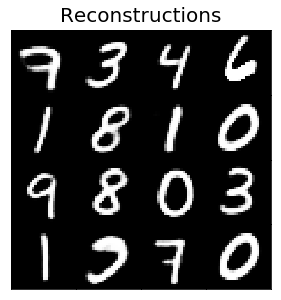

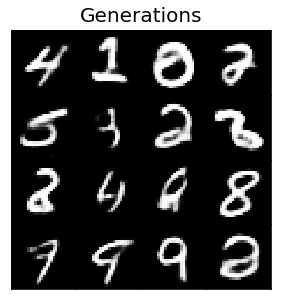

Epoch : 14  | Enc Loss : 87.41931 | Dec Loss : 2.54101 | Disc Loss : 1.91036


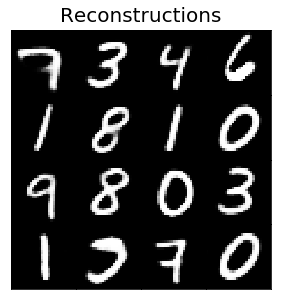

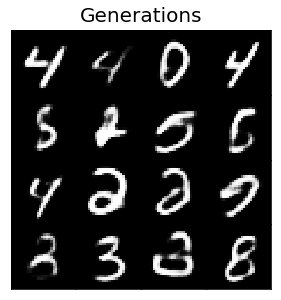

Epoch : 15  | Enc Loss : 85.73906 | Dec Loss : 2.53052 | Disc Loss : 1.90972


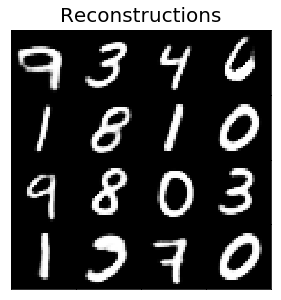

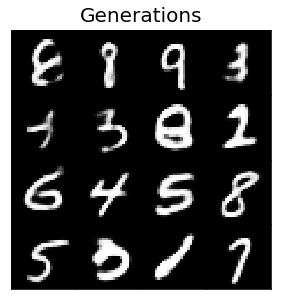

Epoch : 16  | Enc Loss : 84.29875 | Dec Loss : 2.52218 | Disc Loss : 1.90981


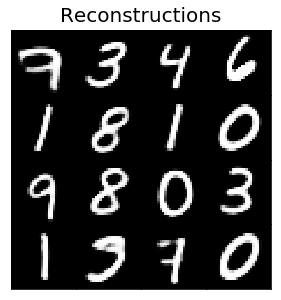

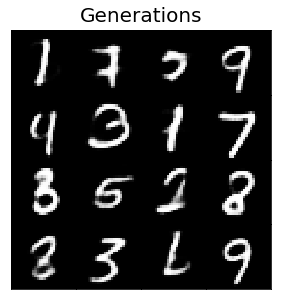

Epoch : 17  | Enc Loss : 83.42341 | Dec Loss : 2.51657 | Disc Loss : 1.90977


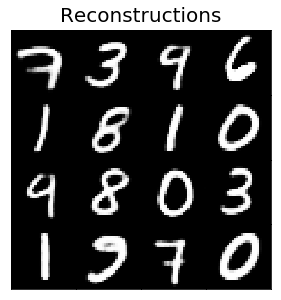

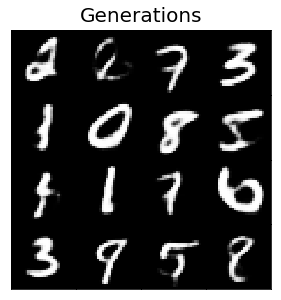

Epoch : 18  | Enc Loss : 82.56911 | Dec Loss : 2.51128 | Disc Loss : 1.90993


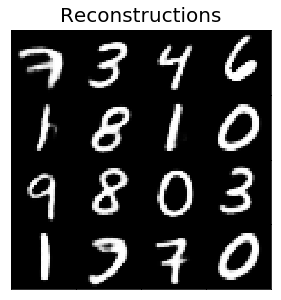

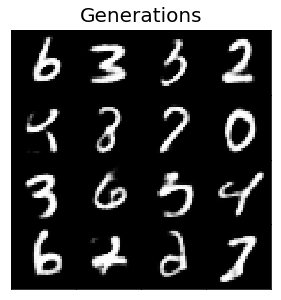

Epoch : 19  | Enc Loss : 81.88730 | Dec Loss : 2.50841 | Disc Loss : 1.91056


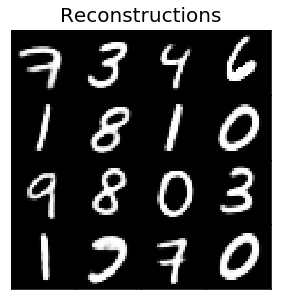

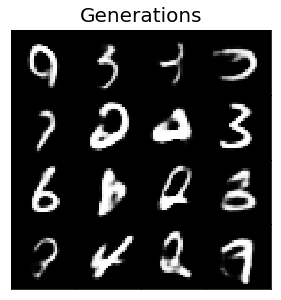

Epoch : 20  | Enc Loss : 81.12404 | Dec Loss : 2.50221 | Disc Loss : 1.90966


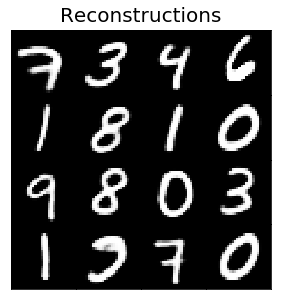

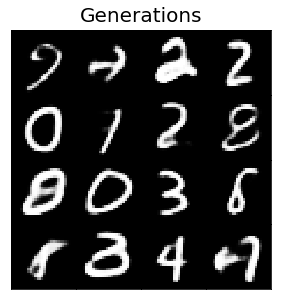

Epoch : 21  | Enc Loss : 80.51361 | Dec Loss : 2.49865 | Disc Loss : 1.90992


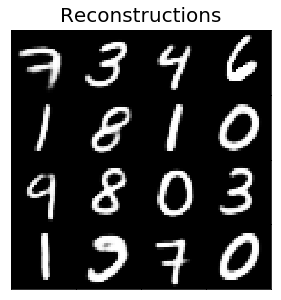

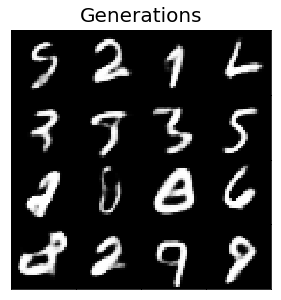

Epoch : 22  | Enc Loss : 80.10614 | Dec Loss : 2.49583 | Disc Loss : 1.90999


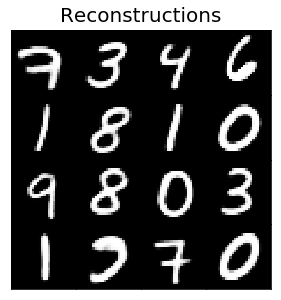

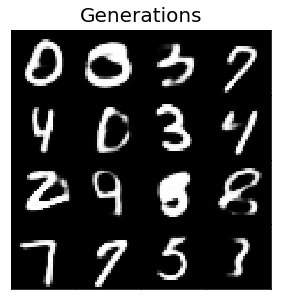

Epoch : 23  | Enc Loss : 79.49362 | Dec Loss : 2.49228 | Disc Loss : 1.90979


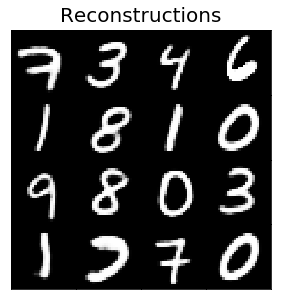

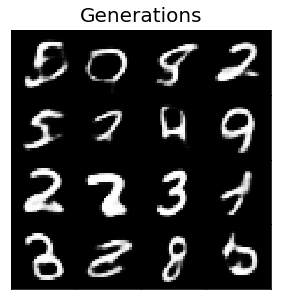

Epoch : 24  | Enc Loss : 78.98933 | Dec Loss : 2.48932 | Disc Loss : 1.90978


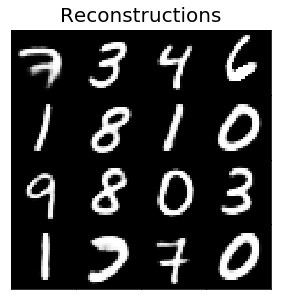

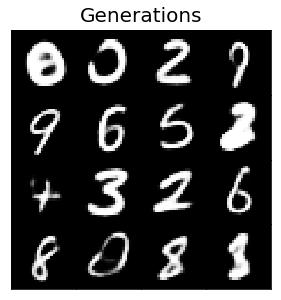

Epoch : 25  | Enc Loss : 78.52565 | Dec Loss : 2.48660 | Disc Loss : 1.90982


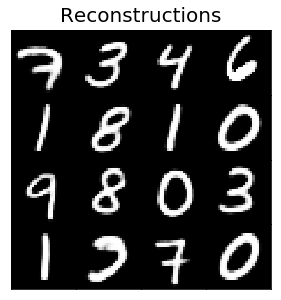

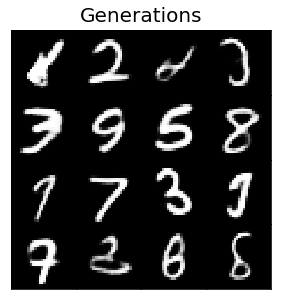

Epoch : 26  | Enc Loss : 78.07198 | Dec Loss : 2.48449 | Disc Loss : 1.90977


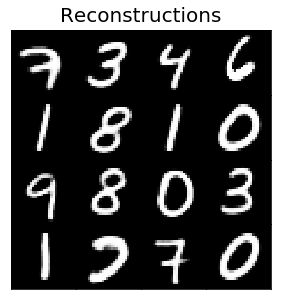

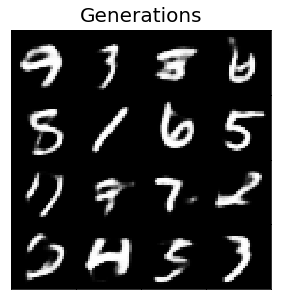

Epoch : 27  | Enc Loss : 77.67054 | Dec Loss : 2.48165 | Disc Loss : 1.90977


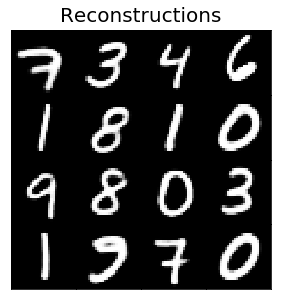

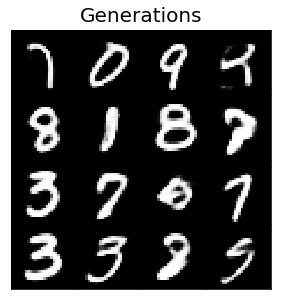

Epoch : 28  | Enc Loss : 77.29435 | Dec Loss : 2.47970 | Disc Loss : 1.90984


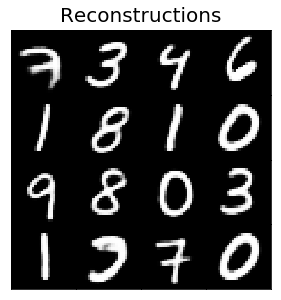

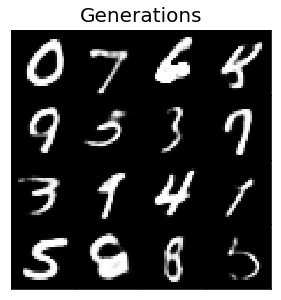

Epoch : 29  | Enc Loss : 77.70038 | Dec Loss : 2.48230 | Disc Loss : 1.91040


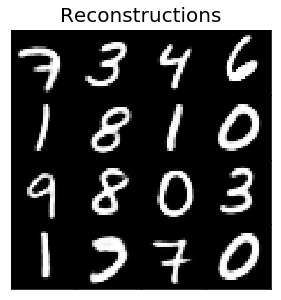

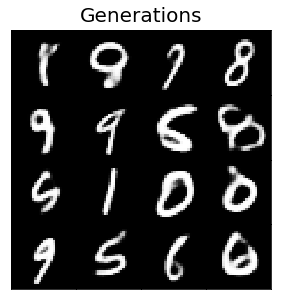

Epoch : 30  | Enc Loss : 76.57788 | Dec Loss : 2.47548 | Disc Loss : 1.90979


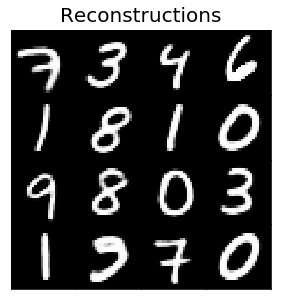

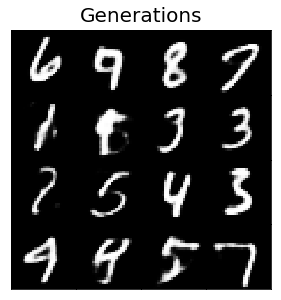

In [2]:
data_train = (np.reshape(mnist.train.images, [-1, 28, 28, 1]) * 2.0 - 1, mnist.train.labels)
data_test = (np.reshape(mnist.test.images, [-1, 28, 28, 1]) * 2.0 - 1, mnist.test.labels)

tf.reset_default_graph()

vae_gan = MNIST_VAE_GAN('tf_logs/exp1/vae-gan/data_test/', lmda=5e-3, zdim=10, learning_rate=5e-4, beta1=0.5)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

trainer = VAE_GAN_Trainer(sess, vae_gan, data_train)
trainer.train(30, p_epochs=1)
